In [1]:
# Install Libraries for visualization
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [2]:
pip install gym pyvirtualdisplay > /dev/null 2>&1

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


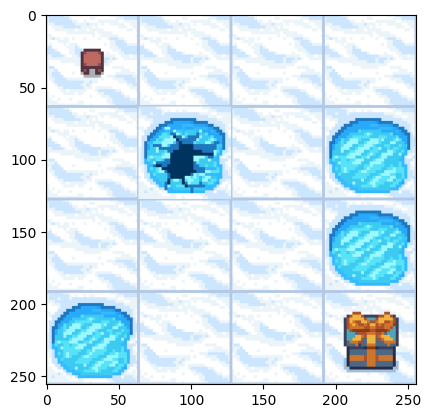

In [5]:

# Initialize environment
env = gym.make('FrozenLake-v1')

# Reset environment and render initial state
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(500):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

In [6]:
def q_learning(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=10000):
    """
    Q-learning algorithm implementation.
    """
    # Initialize Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    # Initialize lists to store rewards and steps per episode
    rewards = []
    steps = []

    for episode in range(num_episodes):
        # Reset environment for new episode
        state = env.reset()
        done = False
        total_reward = 0
        step = 0

        while not done:
            # Choose action based on epsilon-greedy policy
            if np.random.uniform() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state, :])
            # Take action and observe new state and reward
            next_state, reward, done, _ = env.step(action)
            # Update Q-value
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            # Update state and total reward
            state = next_state
            total_reward += reward
            step += 1

        # Store rewards and steps for episode
        rewards.append(total_reward)
        steps.append(step)

    return Q, rewards, steps


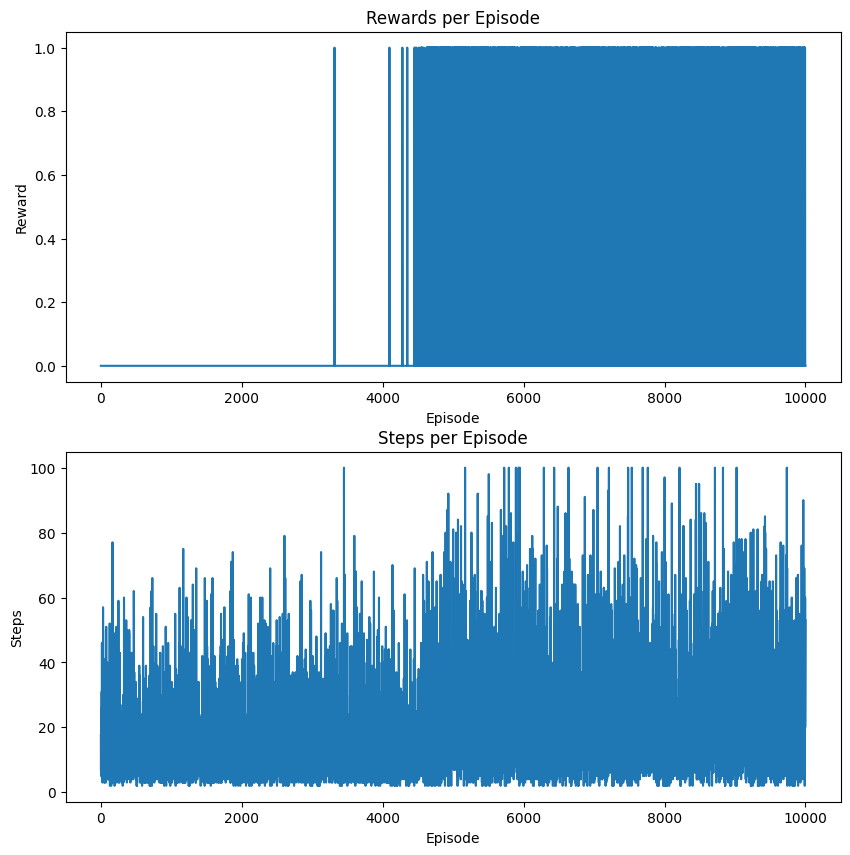

In [11]:
# Run Q-learning algorithm
Q, rewards, steps = q_learning(env)

# Plot rewards and steps per episode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(rewards)
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].set_title('Rewards per Episode')
axs[1].plot(steps)
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Steps')
axs[1].set_title('Steps per Episode')
plt.show()

# Print learned Q-table
#print(Q)


In [12]:
import gym

env = gym.make("Taxi-v3").env

env.reset() # reset environment to a new, random state
print(env.render(mode="ansi"))

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Action Space Discrete(6)
State Space Discrete(500)


In [13]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render(mode="ansi")

State: 328


'+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| : : : : |\n| | : | : |\n|\x1b\x1bY\x1b\x1b| : |B: |\n+---------+\n\n'

In [14]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [15]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if reward == -10:
            penalties += 1
        
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
        
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 3658
Penalties incurred: 1181


In [16]:
from IPython.display import clear_output
from time import sleep
from io import StringIO

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        file = StringIO(frame['frame'])
        print(file.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 3658
State: 0
Action: 5
Reward: 20


In [19]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [20]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
  state = env.reset()

  epochs, penalties, reward, = 0, 0, 0
  done = False
  
  while not done:
      if random.uniform(0, 1) < epsilon:
          action = env.action_space.sample() # Explore action space
      else:
          action = np.argmax(q_table[state]) # Exploit learned values

      next_state, reward, done, info = env.step(action) 
      
      old_value = q_table[state, action]
      next_max = np.max(q_table[next_state])
      
      new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
      q_table[state, action] = new_value

      if reward == -10:
          penalties += 1

      state = next_state
      epochs += 1
      
  if i % 100 == 0:
      clear_output(wait=True)
      print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 27s, sys: 6.89 s, total: 1min 33s
Wall time: 1min 30s


In [21]:
q_table[328]

array([ -2.39732715,  -2.27325184,  -2.41260359,  -2.36113797,
       -10.68521115, -10.81479702])

In [22]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.06
Average penalties per episode: 0.0
